In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
!pip install jovian --upgrade
import jovian

Requirement already up-to-date: jovian in c:\users\preeti sharma\anaconda3\lib\site-packages (0.2.15)


In [25]:
project_name='App Analysis based on no. of Reviews' 

In [26]:
df = pd.read_csv('reviews (1).csv')

In [27]:
df

,PostId,Review,ProductId,Product Name,Likes,Comments,Unnamed: 6
0,-LzRxH3zzoXc-KvPFy_O,boat ROCKERZ 510,QBURCSSMQMRJPTDXQH,boat bassheads 510,1.0,1.0,NaN
1,-M-LOMd-JPexCC-L4z4Z,wireless Bluetooth headphone style up your fu...,QBURCSSMQMRJPTDXQH,boat bassheads 510,1.0,0.0,NaN
2,-LzjPcBLBbwTmrKZRUHk,It s Boombastic Must buy this beast,EKMEFLWFWWKOTCIBRD,boat stone grenade,2.0,0.0,NaN
3,-M0GRgz7I6GxI8yQpDvs,Awesome Bluetooth speaker at such an affordabl...,WXRPTCIBFFVMQPTHUF,portronics por 871 sounddrum,2.0,0.0,NaN
4,-M0lJz9dGydGmykrXz6E,Portronics Sound Drum using Bluetooth 4 2 or A...,WXRPTCIBFFVMQPTHUF,portronics por 871 sounddrum,3.0,1.0,NaN
...,...,...,...,...,...,...,...
115,-M7Img3wb-LhjClrve1K,For better performance it is good battery bac...,PMSODCQVMTXOTAAVYI,realme u1,4.0,0.0,NaN
116,-M7Vo0o56pmp9r4HkiOa,good camera,PMSODCQVMTXOTAAVYI,realme u1,6.0,1.0,NaN
117,-LzReWCuhFEk6SuoiJER,book,DHSZCYMHVHSYBCSBZH,boat bassheads 900,1.0,0.0,NaN
118,-LzRxmJWsIbZBiSQJGSU,Try these fantastic earphones,VXHAYDVDTIPQKIHBHZ,boat bassheads 225,3.0,0.0,NaN


Text(0, 0.5, 'Target')

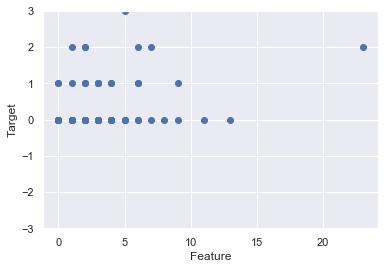

In [28]:
X , y= df['Likes'],df['Comments']
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [30]:
df.describe()

,Likes,Comments,Unnamed: 6
count,119.000000,119.000000,0.0
mean,2.319328,0.310924,NaN
std,3.132478,0.989332,NaN
min,0.000000,0.000000,NaN
25%,0.000000,0.000000,NaN
50%,1.000000,0.000000,NaN
75%,3.000000,0.000000,NaN
max,23.000000,9.000000,NaN


In [31]:
print(df.shape)

(120, 7)


In [32]:
df.isnull().sum()

PostId            0
Review            2
ProductId         0
Product Name      1
Likes             1
Comments          1
Unnamed: 6      120
dtype: int64

In [33]:
df.dtypes

PostId           object
Review           object
ProductId        object
Product Name     object
Likes           float64
Comments        float64
Unnamed: 6      float64
dtype: object

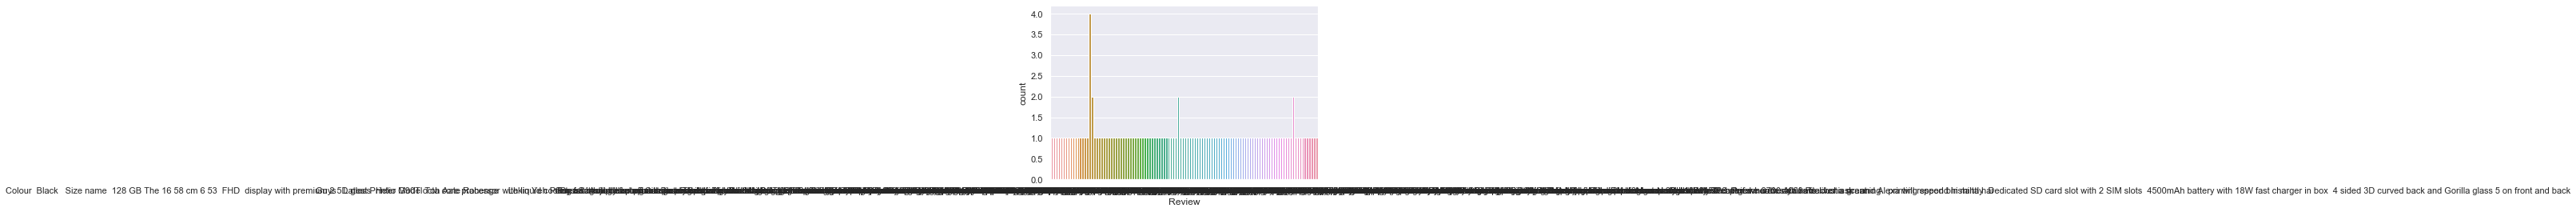

In [34]:
sns.countplot(df['Review'])

In [35]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
X, y = df['Likes'],df['Comments']
a=X.values.reshape(-1,1)
b=y.values.reshape(-1,1)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(a, b, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
#d = reg.fit(X_train,y_train)
#d.reshape(-1,1)
lr = LinearRegression().fit(X_train, y_train)
lr.coef_
lr.intercept_
lr.score(X_train, y_train)        #underfit

0.04499866085902404

In [36]:
c = df["Review"].value_counts()

In [37]:
c

VivoZ1X best in the market                                                                                                                                                                                                                                    4
SAMSUNG GALAXY M30 S                                                                                                                                                                                                                                          2
More performance Less price  Must buy to shift your parties  to another level                                                                                                                                                                                 2
100   New age smartphone                                                                                                                                                                                                                

In [38]:
e = c[1:3]

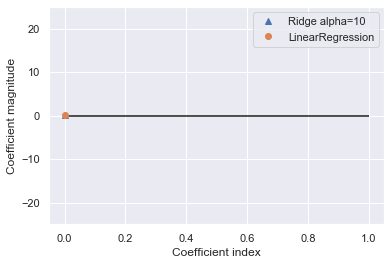

In [39]:
from sklearn.linear_model import Ridge
ridge10 =Ridge(alpha=10).fit(X_train,y_train)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

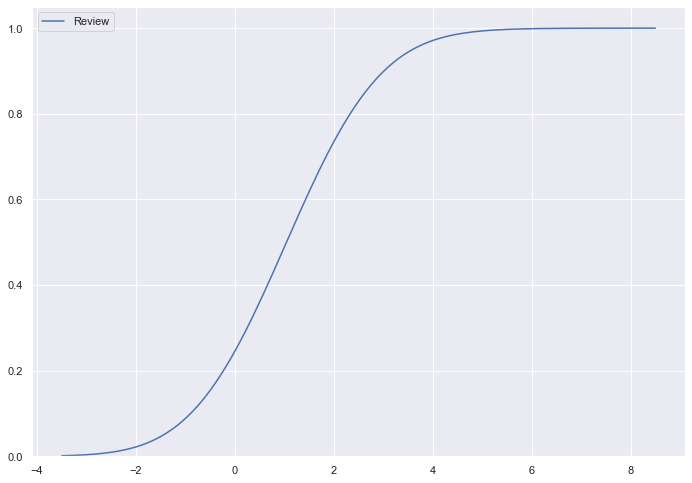

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(c, cumulative=True, bw=1.5)
plt.show()

In [41]:
w = df["Product Name"].value_counts()
w

vivo s1 pro                       6
redmi note 8 pro                  4
redmi note 8                      4
boat rockerz 255                  3
mivi octave                       3
                                 ..
boat bassheads 900                1
samsung galaxy m10s               1
bose soundtouch 30 series iii     1
bose sound link micro             1
vivo v17                          1
Name: Product Name, Length: 70, dtype: int64

C:\Users\preeti sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [112, 70]

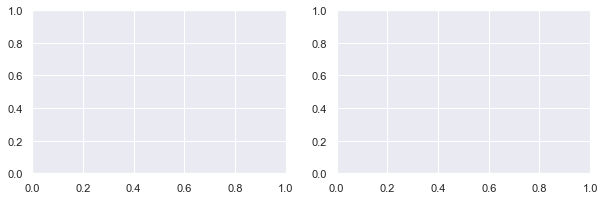

In [42]:
!pip install mglearn
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = c, w
i = X.values.reshape(-1,1)
j = y.values.reshape(-1,1)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(i,j)
    mglearn.plots.plot_2d_separator(clf, i, fill=False, eps=0.5)
    mglearn.discrete_scatter(i[:, 0], i[:, 1], j, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

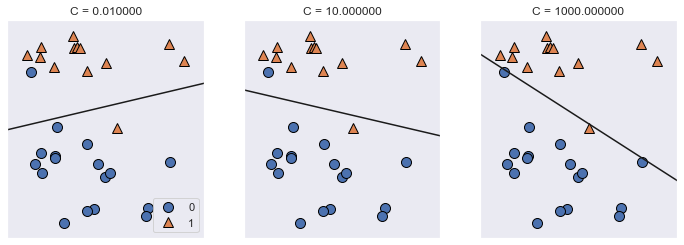

In [43]:
mglearn.plots.plot_linear_svc_regularization()

In [44]:
logreg001 = LogisticRegression(C=0.01).fit(i[1:10]
                                        ,j[1:10])
logreg100 = LogisticRegression(C=100.0).fit(i[1:10]
                                        ,j[1:10])
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(i.shape[1]), j, rotation=90)
plt.hlines(0, 0, i.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

C:\Users\preeti sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\preeti sharma\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'logreg' is not defined

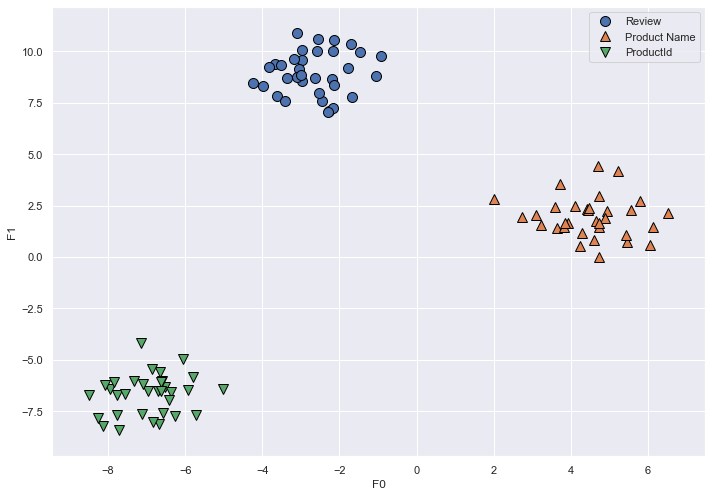

In [45]:
from sklearn.datasets import make_blobs
i,j = make_blobs(random_state=42)
mglearn.discrete_scatter(i[:, 0], i[:, 1], j)
plt.xlabel("F0")
plt.ylabel("F1")
plt.legend(["Review","Product Name","ProductId"])


In [46]:
linear_svm = LinearSVC().fit(i,j)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


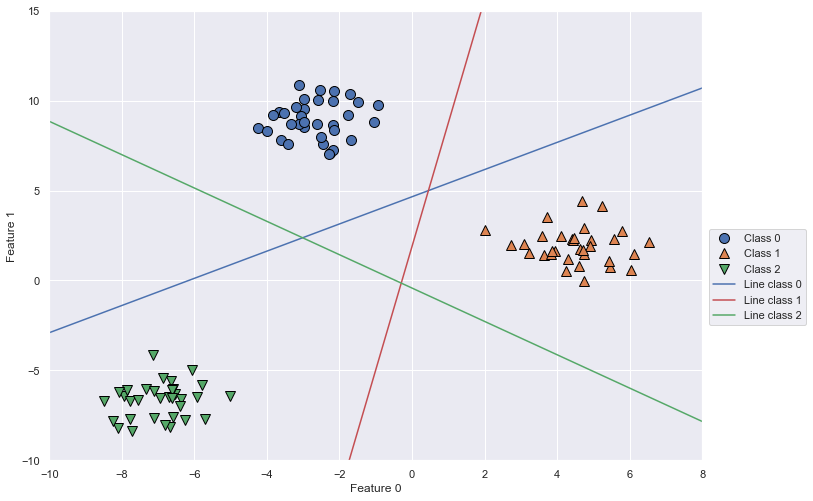

In [47]:
mglearn.discrete_scatter(i[:, 0], i[:, 1], j)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

In [48]:
X= np.array(w[2:5])
            
y = np.array(c[2:5])


In [49]:
counts = {}
for label in np.unique(y):
# iterate over each class
# count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
    print("Feature counts:\n{}".format(counts))

Feature counts:
{1: 3}
Feature counts:
{1: 3, 2: 7}


In [ ]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: 